https://github.com/aegorfk/Mask_RCNN-for-SUN-RGB-D.git

https://github.com/aegorfk/Mask_RCNN-for-SUN-RGB-D/blob/master/samples/sun/Preprocess_dataset.ipynb

Copyright (c) 2018 Ekaterina Lyapina. Contact me for commercial use (or rather any use that is not academic research) (email: ec16513 at qmul.ac.uk). Free for research use, as long as proper attribution is given and this copyright notice is retained.

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/aegorfk/Mask_RCNN-for-SUN-RGB-D.git

In [ ]:
!wget http://rgbd.cs.princeton.edu/data/SUNRGBD.zip

In [ ]:
!unzip SUNRGBD.zip

In [ ]:
!wget http://rgbd.cs.princeton.edu/data/SUNRGBDtoolbox.zip

In [ ]:
!unzip SUNRGBDtoolbox.zip

In [ ]:
import cv2
import SUNRGBD
import random as rand
import pandas as pd
import numpy as np
import json
import os
import shutil
import sys
import h5py
import scipy.io

In [ ]:
path_to_sun = "/content/SUNRGBD/"

In [ ]:
store = []
for f in os.listdir(path_to_sun):
    if not f.startswith('.'):
        store.append(f)
        
b = []
for i in range(len(store)):
    for f in os.listdir(path_to_sun + store[i]):
        if not f.startswith('.'):
            b.append(path_to_sun + store[i] + "/" + f + "/")
store = []

c = []
for i in range(len(b)):
    if b[i] != (path_to_sun + "xtion/sun3ddata/"):
        for f in os.listdir(b[i]):
            if not f.startswith('.'):
                store.append(b[i]  + f + "/")
    else:
        for f in os.listdir(b[i]):
            if not f.startswith('.'):
                c.append(b[i]  + f + "/")

In [ ]:
for i in range(len(c)):
    for f in os.listdir(c[i]):
        if not f.startswith('.'):
            for r in os.listdir(c[i]  + f + "/"):
                if not r.startswith('.'):
                    store.append(c[i]  + f + "/" + r + "/")

In [ ]:
len(store)

10335

In [ ]:
#The standdard trainval-test split uses the first 5050 images for testing and the rest for trainval.
if not os.path.exists((path_to_sun + "test") or (path_to_sun + "train")):
    os.makedirs(path_to_sun + "test")
    os.makedirs(path_to_sun + "train")
if not os.path.exists((path_to_sun + "train" + "/train") or (path_to_sun + "train"+ "/val")):
    os.makedirs(path_to_sun + "train" + "/train")
    os.makedirs(path_to_sun + "train"+ "/val")

#Work with a class mapping

In [ ]:
import pandas as pd
import scipy.io

mat = scipy.io.loadmat('/content/Mask_RCNN-for-SUN-RGB-D/samples/sun/classMapping40.mat')

label_13 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
name_13 = ["bed", "books", "ceiling", 
                 "chair", "floor", "furniture", 
                 "objects", "picture", "sofa", 
                 "table", "tv", "wall", "window"]

labels_13 = pd.DataFrame({
     'label_13': label_13,
     'name_13': name_13})

In [ ]:
list_of_40 = []
for i in range(0, len(mat["className"][0])):
    list_of_40.append(mat["className"][0][i][0]) 
    
label_of_40 = list(range(1,41))
merging = [12,5,6,1,4,9,10,12,13,6,8,6,13,10,6,13,6,7,7,5,7,3,2,6,11,7,7,7,7,7,7,6,7,7,7,7,7,7,6,7]

labels_40 = pd.DataFrame({
     'Label_40': label_of_40,
     'Name_40': list_of_40,
     "label_13": merging})

In [ ]:
allClassName_894 = []
for i in range(0, len(mat["allClassName"][0])):
    allClassName_894.append(mat["allClassName"][0][i][0])

mapClass_894 = []
for i in range(0, len(mat["mapClass"][0])):
    mapClass_894.append(mat["mapClass"][0][i])
    
labels_894 = pd.DataFrame({
     'Label_40': list(mapClass_894),
     'Name_894': list(allClassName_894)})

In [ ]:
labels_894

,Label_40,Name_894
0,40,book
1,40,bottle
2,3,cabinet
3,22,ceiling
4,5,chair
...,...,...
889,40,sewing machine
890,40,rolled up rug
891,39,doily
892,40,coffee pot


In [ ]:
df = pd.read_csv('/content/Mask_RCNN-for-SUN-RGB-D/samples/sun/name_mapping_from_toolbox')
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.merge(df, labels_40, left_on="Label_37", right_on="Label_40").drop([ 'Label_37', 'Name_37'], axis=1)
# df = pd.merge(df, labels_40, left_on="Label_37", right_on="Label_40")

In [ ]:
df

,Label_37,Label_6585,Name_6585,Name_37,Label_40,Name_40,label_13
0,21,995,clothing detergent,clothes,21,clothes,7
1,7,5390,table runner,table,7,table,10
2,16,1346,curtain rod,curtain,16,curtain,13
3,15,4822,shelves_for_electrical_shop,shelves,15,shelves,6
4,13,413,block,blinds,13,blinds,13
5,2,2176,floor mat,floor,2,floor,5
6,32,3548,night_syand,night_stand,32,night stand,6
7,18,3972,pillow_corner,pillow,18,pillow,7
8,37,193,bag of bagels,bag,37,bag,7
9,6,5023,sofa_bed,sofe,6,sofa,9


In [ ]:
# labels_40 = labels_40.drop(labels=[37,38,39], axis=0)

In [ ]:
names = []
for i in range(40):
    names.append(labels_40["Name_40"][i])
    # print(labels_40["Name_40"][i])

In [ ]:
names

['wall',
 'floor',
 'cabinet',
 'bed',
 'chair',
 'sofa',
 'table',
 'door',
 'window',
 'bookshelf',
 'picture',
 'counter',
 'blinds',
 'desk',
 'shelves',
 'curtain',
 'dresser',
 'pillow',
 'mirror',
 'floor mat',
 'clothes',
 'ceiling',
 'books',
 'refridgerator',
 'television',
 'paper',
 'towel',
 'shower curtain',
 'box',
 'whiteboard',
 'person',
 'night stand',
 'toilet',
 'sink',
 'lamp',
 'bathtub',
 'bag',
 'otherstructure',
 'otherfurniture',
 'otherprop']

In [ ]:
labels_40["Name_40"][0]

'wall'

In [ ]:
labels_40

,Label_40,Name_40,label_13
0,1,wall,12
1,2,floor,5
2,3,cabinet,6
3,4,bed,1
4,5,chair,4
5,6,sofa,9
6,7,table,10
7,8,door,12
8,9,window,13
9,10,bookshelf,6


In [ ]:
print(labels_894.loc[labels_894['Name_894'] == 'book'])
df3 = pd.merge(labels_894, labels_40)
final_dataset = pd.merge(df3, labels_13)

   Label_40 Name_894
0        40     book


In [ ]:
# labels_needed = {}
# # #Converting data to work with 13 classes
# for i in range(0, len(df)):
#     labels_needed[str(df.iloc[i]['Name_6585'])] = df.iloc[i]['label_13']
    
# # Adding data for the sun from matlab file
# #Converting data to work with 13 classes
# for i in range(0, len(final_dataset)):
#     labels_needed[str(final_dataset.iloc[i]['Name_894'])] = final_dataset.iloc[i]['label_13']

In [ ]:
labels_needed = {}
#Converting data to work with 37 classes
for i in range(0, len(df)):
    labels_needed[str(df.iloc[i]['Name_6585'])] = df.iloc[i]['Label_40']
    
# Adding data for the sun from matlab file
#Converting data to work with 37 classes
for i in range(0, len(final_dataset)):
    labels_needed[str(final_dataset.iloc[i]['Name_894'])] = final_dataset.iloc[i]['Label_40']

In [ ]:
labels_needed

{'air conditioner': 38,
 'air duct': 38,
 'air vent': 38,
 'alarm': 40,
 'alarm clock': 40,
 'album': 40,
 'aluminium foil': 40,
 'american flag': 40,
 'antenna': 40,
 'apple': 40,
 'ashtray': 40,
 'avocado': 40,
 'baby chair': 39,
 'baby gate': 38,
 'back scrubber': 40,
 'backpack': 40,
 'bag': 37,
 'bag of bagels': 40,
 'bag of chips': 40,
 'bag of flour': 40,
 'bag of hot dog buns': 40,
 'bag of oreo': 40,
 'bagel': 40,
 'baking dish': 40,
 'ball': 40,
 'balloon': 40,
 'banana': 40,
 'banana peel': 40,
 'banister': 38,
 'bar': 38,
 'bar of soap': 40,
 'barrel': 39,
 'baseball': 40,
 'basket': 40,
 'basketball': 40,
 'basketball hoop': 40,
 'bassinet': 39,
 'bathtub': 36,
 'battary': 36,
 'bean bag': 39,
 'bed': 4,
 'bed sheets': 40,
 'bedding package': 40,
 'beeper': 40,
 'belt': 40,
 'bench': 39,
 'bicycle': 40,
 'bicycle helmet': 40,
 'bin': 40,
 'binder': 40,
 'blackboard': 38,
 'blanket': 40,
 'blender': 40,
 'blinds': 13,
 'block': 13,
 'board': 38,
 'book': 40,
 'book holder':

In [ ]:
for i in labels_needed:
    if labels_needed[i] == 37:
        print(i)

bag


# Start the parsing

In [ ]:
all_labels = []
for key in labels_needed.keys():
    all_labels.append(key)

In [ ]:
!pip install stringdist

In [ ]:
import stringdist

ufo = {}
def transformation(image_root, number_of_image):
    # Set the paths
    image_root = image_root
    path_to_image = image_root + "image/" + (os.listdir(image_root + "/image/")[0])
    anotation = image_root + 'annotation2Dfinal'
    
    with open(anotation + "/index.json") as data_file:
        data = json.load(data_file)
    
    numberOfAnot = len(data["frames"][0]["polygon"])
    element = {}

    size =  os.path.getsize(path_to_image)
    filename = os.listdir(image_root + "/image")
    filename = filename[0]

    element = {"fileref": '', "size": size, 
        "filename": str(number_of_image) + ".jpg", 'base64_img_data': '', 'file_attributes': {}, 'regions': {}}
    
    anootation2D = []
    labels2D = []
    regions = {}
    
    for i in range(0, numberOfAnot):
        x = data["frames"][0]["polygon"][i]["x"]
        y = data["frames"][0]["polygon"][i]["y"]
        idxObj = data["frames"][0]["polygon"][i]["object"]
        if idxObj <= len(data['objects']):
            label = data['objects'][idxObj]["name"].lower()
            label = ''.join(i for i in label if not i.isdigit())
            if label in labels_needed:
                label = labels_needed[label]
            else:
                leve = {}
                for i in range(0,len(all_labels)):
                    leve[all_labels[i]] = stringdist.levenshtein(label, all_labels[i])
                label = labels_needed[min(leve, key=leve.get)]
                ufo[min(leve, key=leve.get)] = label
            if type(x) == list and type(y) == list:
                all_points_x = list(map(round, x))
                all_points_y = list(map(round, y))
                if len(all_points_y) != 0 and len(all_points_x) != 0:
                    shape_attributes = {'name':'polygon',"all_points_x":x,"all_points_y":y}
                    region = {'shape_attributes': {'name': 'polygon',
                    'all_points_x': x, 'all_points_y': y}, 'region_attributes': {"class": int(label)}}  
                    element['regions'][str(i)] = region
    return element

In [ ]:
# For the NYU dataset
# 80% of train images - 1160 pics (0, 1160)
   # 10% test - 145 pics (1160,1305)
   # 10: validation - 144 pics (1305, 1449)
# 20% of test images - 289

# 5050 test images store[0 : 5049]
# 5285 train-val images [5050 : 10334]
   # 4226 train images [5050:9275]
   # 1056 validation images [9276: 10333]
d = {}
fail = []
for i in range(5050, 9275):
    try:
        element2 = {}
        number_of_image = i
        print(number_of_image)
        element2 = transformation(store[i], number_of_image)
    # except json.decoder.JSONDecodeError:
    except ValueError:
        print("Error with " + store[i])
        fail.append(store[i])
    #print(element2)
    if element2:
        file_name = os.listdir(store[i] + "/image")[0]
        file_to_copy = store[i] + "image/" + file_name
        target_dir = path_to_sun + "train/train/"
        shutil.copyfile(file_to_copy, target_dir + str(i) + ".jpg")
        d[str(i) + ".jpg" + str(os.path.getsize(file_to_copy))] = element2

jsonname2 =  path_to_sun + "train/train/" + "via_region_data.json"
with open(jsonname2, 'w') as fp:
        json.dump(d, fp)

In [ ]:
print("Pictures failed:" + str(len(fail)))
print("Pictures parsed:" + str(len(d)))

Pictures failed:18
Pictures parsed:4207


In [ ]:
d2 = {}
fail2 = []
for i in range(0,5049):
    try:
        element2 = {}
        number_of_image = i
        print(number_of_image)
        element2 = transformation(store[i], number_of_image)
        #print(element2)
        if element2:
            file_name = os.listdir(store[i] + "/image")[0]
            file_to_copy = store[i] + "image/" + file_name
            target_dir = path_to_sun + "test/"
            shutil.copyfile(file_to_copy, target_dir + str(i) + ".jpg")
            d2[str(i) + ".jpg" + str(os.path.getsize(file_to_copy))] = element2
    #except json.decoder.JSONDecodeError:
    except ValueError:
        print("Error with " + store[i])
        fail2.append(store[i])

jsonname2 =  path_to_sun + "test/" + "via_region_data.json"
with open(jsonname2, 'w') as fp:
        json.dump(d2, fp)

In [ ]:
print("Pictures failed:" + str(len(fail2)))
print("Pictures parsed:" + str(len(d2)))

Pictures failed:12
Pictures parsed:5037


In [ ]:
d3 = {}
fail3 = []
for i in range(9276,10333):
    try:
        element2 = {}
        number_of_image = i
        print(number_of_image)
        element2 = transformation(store[i], number_of_image)
    except json.decoder.JSONDecodeError:
        print("Error with " + store[i])
        fail3.append(store[i])
    #print(element2)
    if element2:
        file_name = os.listdir(store[i] + "/image")[0]
        file_to_copy = store[i] + "image/" + file_name
        target_dir = path_to_sun + "train/val/"
        shutil.copyfile(file_to_copy, target_dir + str(i) + ".jpg")
        d3[str(i) + ".jpg" + str(os.path.getsize(file_to_copy))] = element2

jsonname2 =  path_to_sun + "train/val/" + "via_region_data.json"
with open(jsonname2, 'w') as fp:
        json.dump(d3, fp)

In [ ]:
print("Pictures failed:" + str(len(fail3)))
print("Pictures parsed:" + str(len(d3)))

Pictures failed:10
Pictures parsed:1047


In [ ]:
image_root = store[100]

In [ ]:
import cv2
from os import listdir
import json
import numpy as np

class FrameData:
	def __init__(self, imgRGB,imgD,annotation2D,labels2D):
		self.imgRGB = imgRGB
		self.imgD = imgD
		self.annotation2D = annotation2D
		self.labels2D = labels2D
		
def readFrame( framePath, bfx ):
	#read RGB information to numpy array	
	rgbPath = framePath + "/image/" 
	rgbPath += listdir(rgbPath)[0]
	imgRGB = cv2.imread(rgbPath);
	
	#read depth information to numpy array
	if not(bfx):
		depthPath = framePath + "/depth/" 
	else:
		depthPath = framePath + "/depth_bfx/" 
	depthPath += listdir(depthPath)[0]
	imgD = cv2.imread(depthPath);
	
	#read 2D annotations to a list o numpy arrays where each index 
    #is related with one object polygon and a list where the index links 
    #the object polygon to the object label.
	anotation2D = framePath + "/annotation2Dfinal/index.json"
	
	with open(anotation2D) as data_file:    
		data = json.load(data_file)
			
	numberOfAnot = len(data["frames"][0]["polygon"]);
	
	anootation2D = [];
	labels2D = [];
	for i in range(0,numberOfAnot):
		x = data["frames"][0]["polygon"][i]["x"]
		y = data["frames"][0]["polygon"][i]["y"]

		idxObj = data["frames"][0]["polygon"][i]["object"];
		pts2 = np.array([x,y], np.int32)
		pts2 = np.transpose(pts2);
		anootation2D.append(pts2);
		
		labels2D.append(data['objects'][idxObj]["name"])
		
	frameData = FrameData(imgRGB,imgD,anootation2D,labels2D)

	return frameData;

In [ ]:
frameData = readFrame(image_root, True )

In [ ]:
import matplotlib.pyplot as plt
imgRGBWithAnnotations = np.array(frameData.imgRGB, copy=True)

for i in range(0, len(frameData.annotation2D)):
    color = [rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)]
    cv2.fillPoly(imgRGBWithAnnotations, [frameData.annotation2D[i]], color)
    
for i in range(0, len(frameData.annotation2D)):
    data = frameData.annotation2D[i];
    centroid = np.mean(data,axis=0)
    cv2.putText(imgRGBWithAnnotations, frameData.labels2D[i], (int(centroid[0]), int(centroid[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,0,0],2)

In [ ]:
data = frameData.annotation2D
data2 = frameData.labels2D

In [ ]:
anotation2D = image_root + "/annotation2Dfinal/index.json"

with open(anotation2D) as data_file:    
    data = json.load(data_file)

    numberOfAnot = len(data["frames"][0]["polygon"]);
    anootation2D = [];
    labels2D = [];
    for i in range(0,numberOfAnot):
        x = data["frames"][0]["polygon"][i]["x"]
        y = data["frames"][0]["polygon"][i]["y"]

        idxObj = data["frames"][0]["polygon"][i]["object"];
        pts2 = np.array([x,y], np.int32)
        pts2 = np.transpose(pts2);
        anootation2D.append(pts2);
        labels2D.append(data['objects'][idxObj]["name"])

Depth data


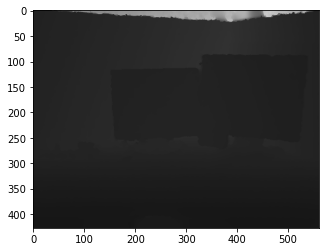

In [ ]:
print("Depth data")
plt.imshow(frameData.imgD);

RGB Image


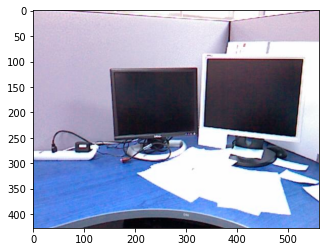

In [ ]:
print("RGB Image")
plt.imshow(frameData.imgRGB);

Annotated Image


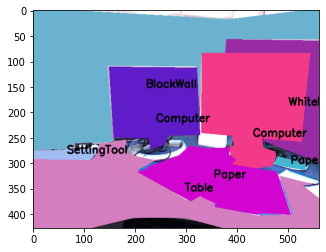

In [ ]:
print("Annotated Image")
plt.imshow(imgRGBWithAnnotations);

In [ ]:
import shutil

In [ ]:
shutil.copytree("/content/SUNRGBD/test/", "/content/drive/MyDrive/SUNRGBDimages/test")  

In [ ]:
shutil.copytree("/content/SUNRGBD/train/", "/content/drive/MyDrive/SUNRGBDimages/train")  

In [ ]:
shutil.copy("/content/SUNRGBD/train/train/via_region_data.json", "/content/drive/MyDrive/SUNRGBDimages/train.json")

In [ ]:
shutil.copy("/content/SUNRGBD/test/via_region_data.json", "/content/drive/MyDrive/SUNRGBDimages/test.json")

In [ ]:
shutil.copy("/content/SUNRGBD/train/val/via_region_data.json", "/content/drive/MyDrive/SUNRGBDimages/val.json")